In [24]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Hyperparameters can be used to adjust the fit of a ml-model
# "hyperparameter tuning" is done using a brute force search, for example 
# over multiple values of n_neighbors

from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor

# generate a toy dataset
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.normal(size=len(x))
X = x[:, np.newaxis]

cv = KFold(shuffle = True)

# for each parameter setting do cross-validation
for n_neighbors in [1,3,5,10,20]:
    scores = cross_val_score(KNeighborsRegressor(n_neighbors=n_neighbors), X, y, cv=cv)
    print "n_neighbors: %d, average score: %f" % (n_neighbors, np.mean(scores))

n_neighbors: 1, average score: 0.537992
n_neighbors: 3, average score: 0.703410
n_neighbors: 5, average score: 0.758277
n_neighbors: 10, average score: 0.725944
n_neighbors: 20, average score: 0.621668


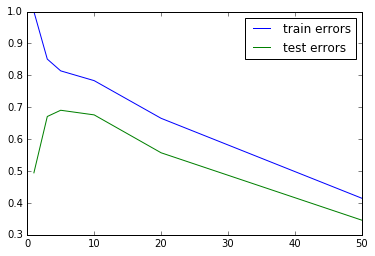

In [26]:
# there is a function called validation_plot which plots one parameter such as number of 
# neighbors against training and validation error (using cross-validation)

from sklearn.model_selection import validation_curve
n_neighbors = [1,3,5,10,20,50]
train_errors, test_errors = validation_curve(KNeighborsRegressor(), X, y, 
                                             param_name='n_neighbors',
                                             param_range=n_neighbors, cv=cv)
plt.plot(n_neighbors, train_errors.mean(axis=1), label='train errors')
plt.plot(n_neighbors, test_errors.mean(axis=1), label='test errors')
plt.legend(loc='best')

In [27]:
# if multiple parameters are important such as C and gamma in SVR, all possible
# combinations are tried

from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR

# each parameter setting do a cross-validation
for C in [0.001, 0.01, 0.1, 1, 10]:
    for gamma in [0.001, 0.01, 0.1, 1]:
        scores = cross_val_score(SVR(C=C, gamma=gamma), X, y, cv=cv)
        print "C: %f, gamma: %f, average score: %f" % (C, gamma, np.mean(scores))

C: 0.001000, gamma: 0.001000, average score: -0.022086
C: 0.001000, gamma: 0.010000, average score: -0.055777
C: 0.001000, gamma: 0.100000, average score: -0.005297
C: 0.001000, gamma: 1.000000, average score: 0.008344
C: 0.010000, gamma: 0.001000, average score: -0.001671
C: 0.010000, gamma: 0.010000, average score: 0.019553
C: 0.010000, gamma: 0.100000, average score: 0.091870
C: 0.010000, gamma: 1.000000, average score: 0.086761
C: 0.100000, gamma: 0.001000, average score: -0.004807
C: 0.100000, gamma: 0.010000, average score: 0.056073
C: 0.100000, gamma: 0.100000, average score: 0.489771
C: 0.100000, gamma: 1.000000, average score: 0.475714
C: 1.000000, gamma: 0.001000, average score: 0.120324
C: 1.000000, gamma: 0.010000, average score: 0.560419
C: 1.000000, gamma: 0.100000, average score: 0.667593
C: 1.000000, gamma: 1.000000, average score: 0.673781
C: 10.000000, gamma: 0.001000, average score: 0.564951
C: 10.000000, gamma: 0.010000, average score: 0.605981
C: 10.000000, gamma: 

In [28]:
# as this practice is common, there is a class in scikit-learn for this purpose, GridSearchCV
# GridSearchCV takes a dictionary that describes parameters that should be tried and 
# a model to train

from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10], 'gamma':[0.001, 0.01, 0.1, 1]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=3)

In [29]:
# One great thing about GridSearchCV is that it is a meta-estimator. It takes an estimator 
# like SVR and creates a new estimator, that behaves exactly the same - in this case
# like a regressor. And so we can call fit on it to train it:

grid.fit(X,y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............ C=0.001, gamma=0.001, score=-0.054897, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............ C=0.001, gamma=0.001, score=-0.009546, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............ C=0.001, gamma=0.001, score=-0.000587, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ............. C=0.001, gamma=0.01, score=-0.051755, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ............. C=0.001, gamma=0.01, score=-0.007532, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............. C=0.001, gamma=0.01, score=0.001280, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [30]:
# we can also use predict() or score() such as in all models

grid.predict(X)

array([-1.79762875, -1.74054091, -1.71412904, -1.72272347, -1.76880247,
       -1.8527208 , -1.97255382, -2.12407501, -2.30087676, -2.49463429,
       -2.695503  , -2.89262935, -3.07474705, -3.23082299, -3.35071314,
       -3.42578612, -3.44947391, -3.41771237, -3.32924127, -3.18574205,
       -2.9918017 , -2.75470244, -2.48404785, -2.19124658, -1.88888388,
       -1.59001819, -1.30744475, -1.05297034, -0.8367425 , -0.66667333,
       -0.54799235, -0.4829551 , -0.4707249 , -0.50743515, -0.58642852,
       -0.69865919, -0.83323456, -0.97806438, -1.12057877, -1.24847261,
       -1.35043139, -1.41679516, -1.44012026, -1.41560488, -1.3413525 ,
       -1.21845724, -1.05090633, -0.84530623, -0.61045003, -0.35675398,
       -0.09559933,  0.16137852,  0.40300817,  0.61926205,  0.80185531,
        0.94472644,  1.04437082,  1.10000798,  1.11357463,  1.08954695,
        1.03460678,  0.95717608,  0.86685224,  0.7737823 ,  0.68801751,
        0.61888941,  0.57444669,  0.56098656,  0.58270777,  0.64

In [31]:
print(grid.best_score_)

0.764347080919


In [32]:
print(grid.best_params_)

{'C': 10, 'gamma': 1}


In [33]:
# There is a problem with using the grid score for evaluation. You might be making a 
# multiple hypothesis testing error.
# If very many parameter settings are tried, some will work better than others just by chance
# and the score that was obtained might not reflect how the model would perform on new
# unseen data.

# Therefore it is good to split off a seperate test-set before performing grid-search

# We do this by using train_test_split(). Training GridSearchCV() on the training set, and 
# applying the score method to the test set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
cv = KFold(n_splits=10, shuffle=True)

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv)

grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.7262035177984737

In [34]:
grid.best_params_

{'C': 10, 'gamma': 1}

In [35]:
# Some practitioners go for splitting data into only three parts: training, validation,
# and testing. This is a possible alternative if the dataset is very large.
# This can be done with scikit-learn by splitting a test-set and then applying GridSearchCV()
# with ShuffleSplit cross-validation with a single iteration

from sklearn.model_selection import train_test_split, ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
single_split_cv = ShuffleSplit(n_splits=1)

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=single_split_cv, verbose=3)

grid.fit(X_train, y_train)
grid.score(X_test, y_test)

Fitting 1 folds for each of 20 candidates, totalling 20 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............ C=0.001, gamma=0.001, score=-0.003754, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ............. C=0.001, gamma=0.01, score=-0.001623, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ............... C=0.001, gamma=0.1, score=0.007980, total=   0.0s
[CV] C=0.001, gamma=1 ................................................
[CV] ................. C=0.001, gamma=1, score=0.006677, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] ............. C=0.01, gamma=0.001, score=-0.001414, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ............... C=0.01, gamma=0.01, score=0.020541, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


0.64149052352998392

In [36]:
# This method is much faster but might result in worse hyperparameters and worse results

clf = GridSearchCV(SVR(), param_grid=param_grid)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7262035177984737